In [417]:
import sys, os
from datetime import datetime
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import Environment as env_mod
import truck as truck_mod
import DataArrangement as data_mod


# simulator class
importlib.reload(env_mod)
SimulationConfig = env_mod.SimulationConfig
Simulator = env_mod.Simulator


# truck class
importlib.reload(truck_mod)  
Truck = truck_mod.Truck      
create_fleet = truck_mod.create_fleet

# data arrangement class
importlib.reload(data_mod)
DataArrange = data_mod.DataArrange

In [418]:
# Simulator Configuration
cfg = SimulationConfig(
    start_time = datetime(2025, 1, 1),
    total_time = 365,
    delta_time = 1
)

# Simulator
sim = Simulator(config=cfg, seed=1, n_trucks=10, n_parts=100)
events = sim.run()
# print(events)

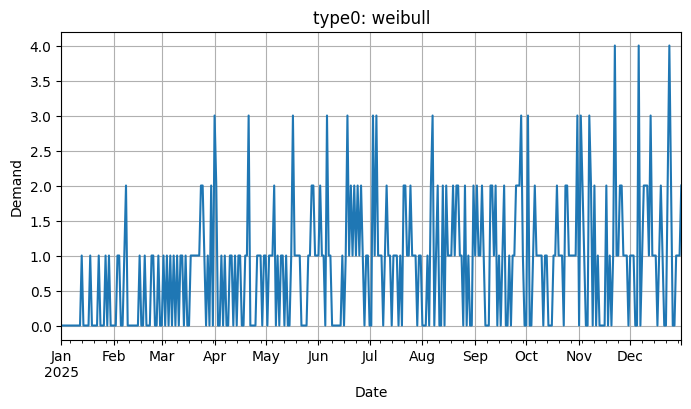

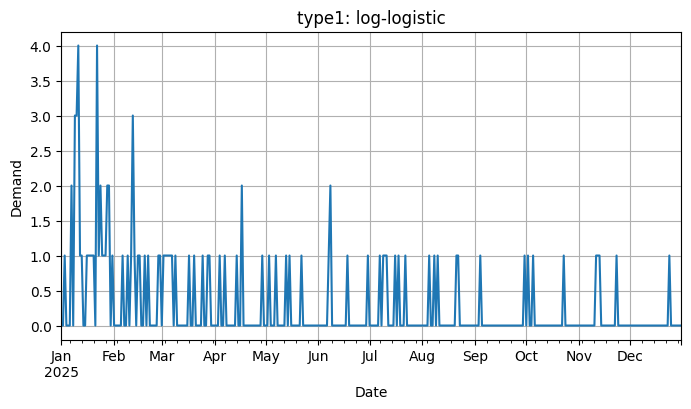

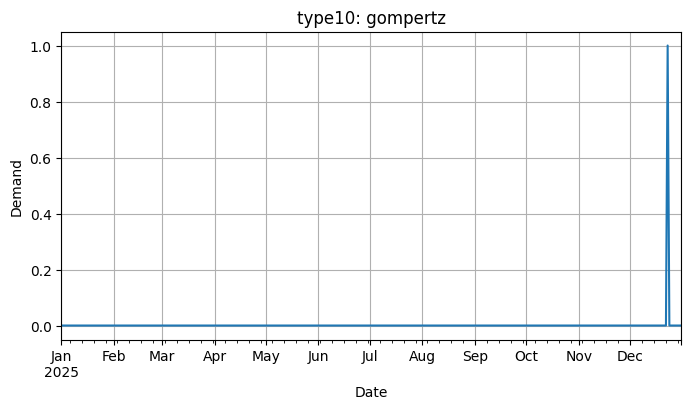

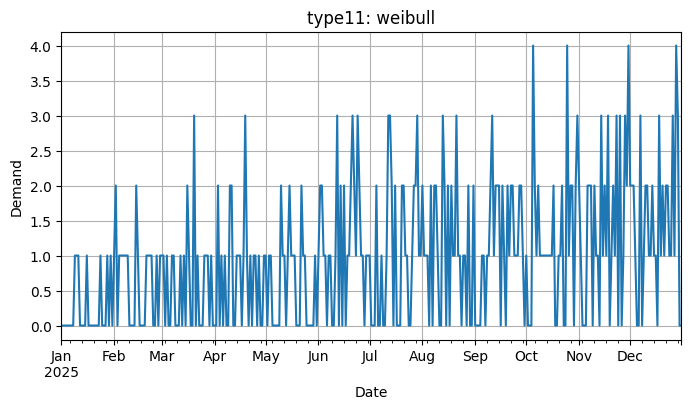

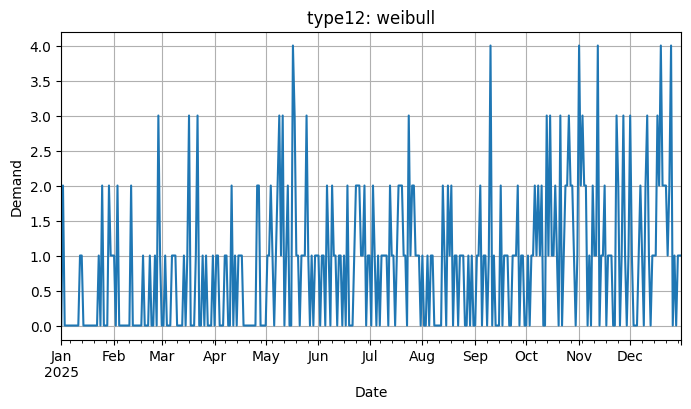

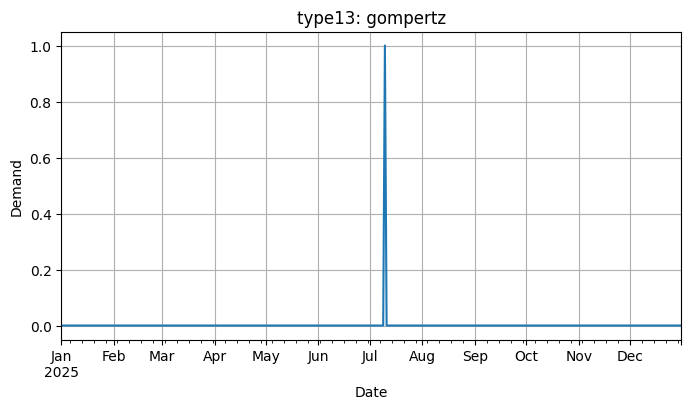

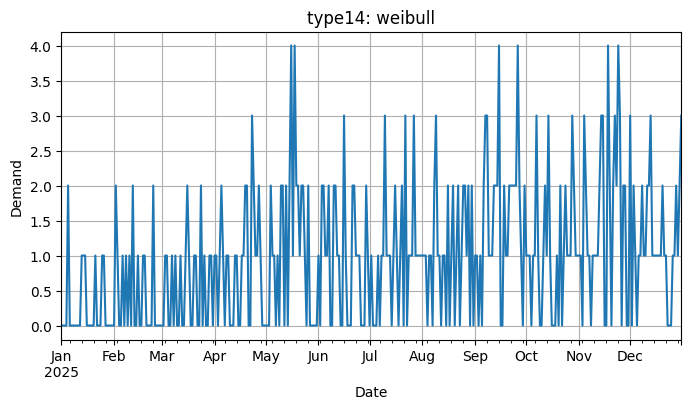

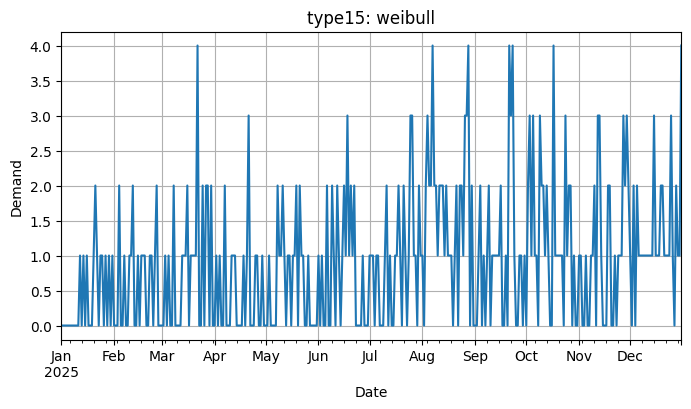

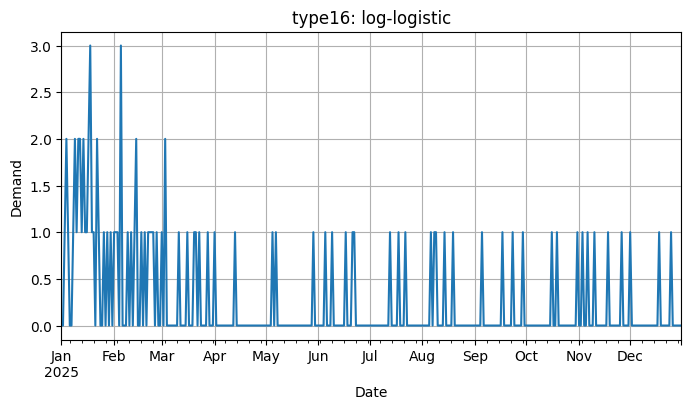

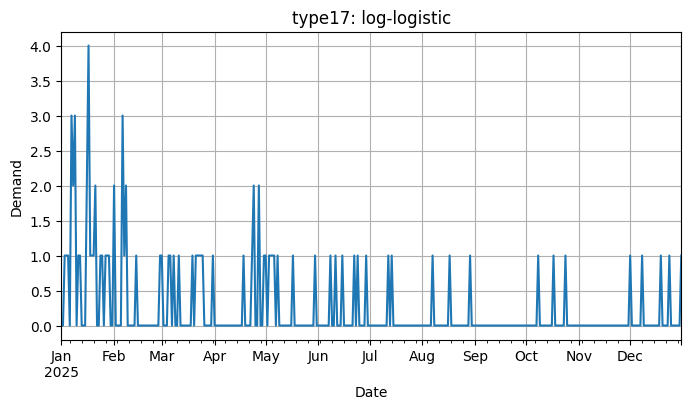

In [419]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# each part 
for col in data_arrange.data_part.columns[:10]:
    data_arrange.data_part[col].plot(figsize=(8,4), title=str(col)+": "+str(sim.PART_INFO[col]["failure_model"]))
    plt.xlabel("Date")
    plt.ylabel("Demand")
    plt.grid(True)
    plt.show()




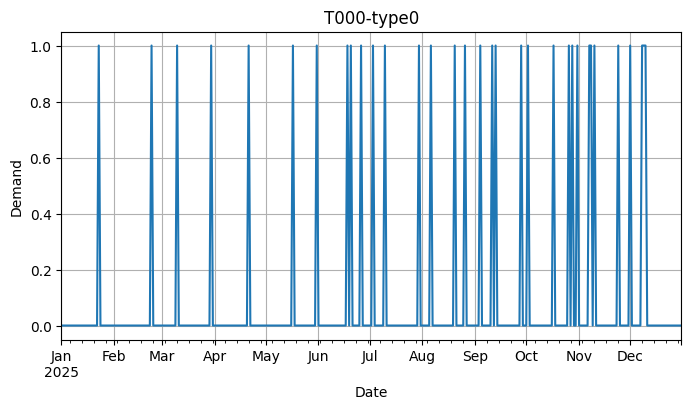

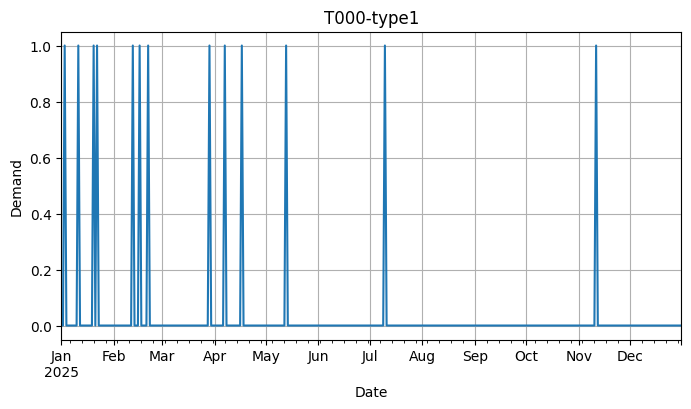

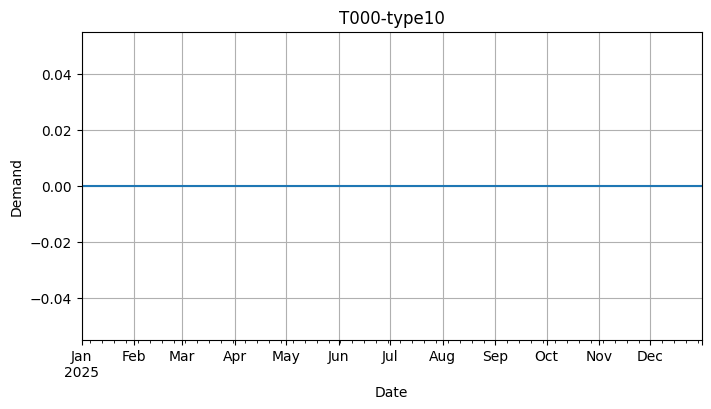

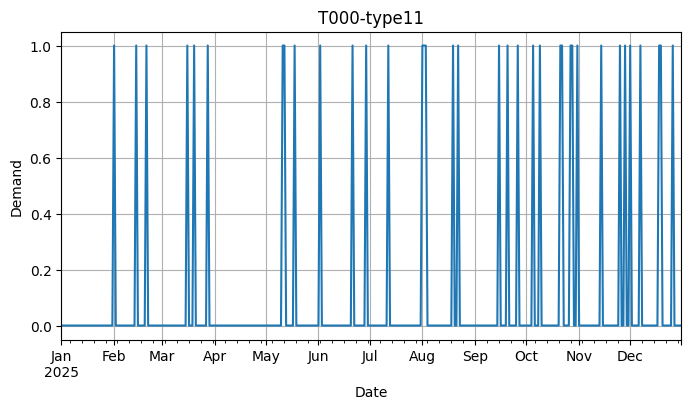

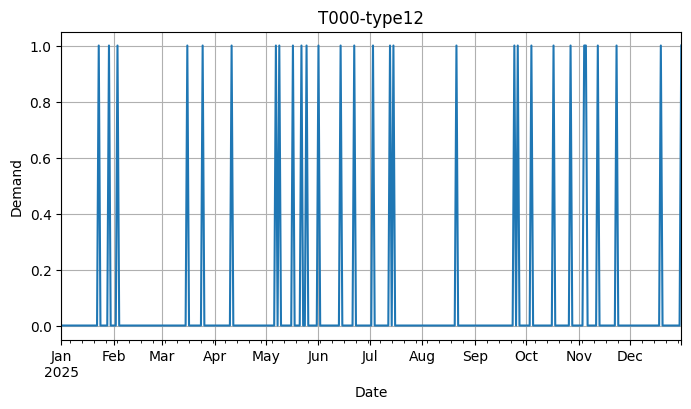

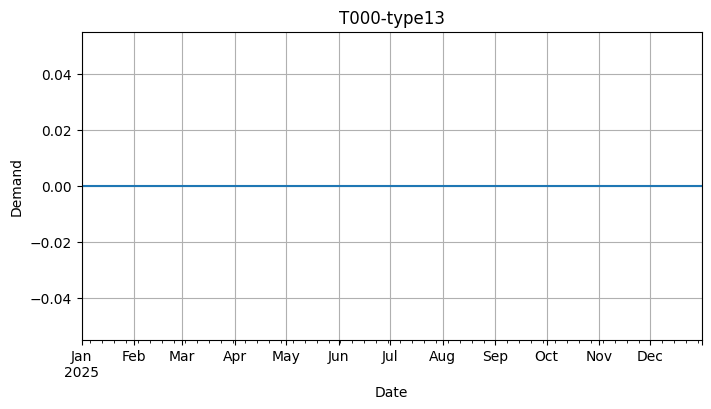

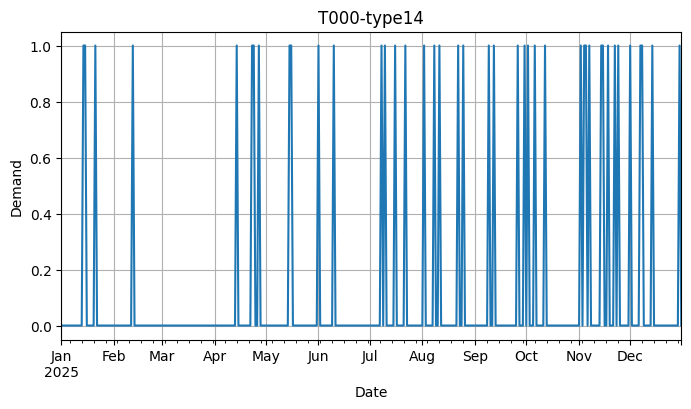

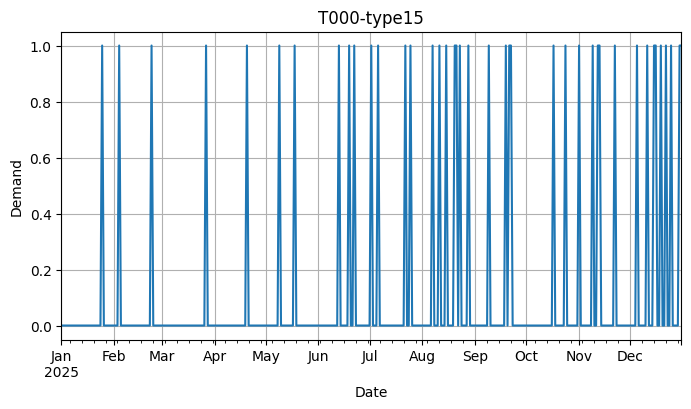

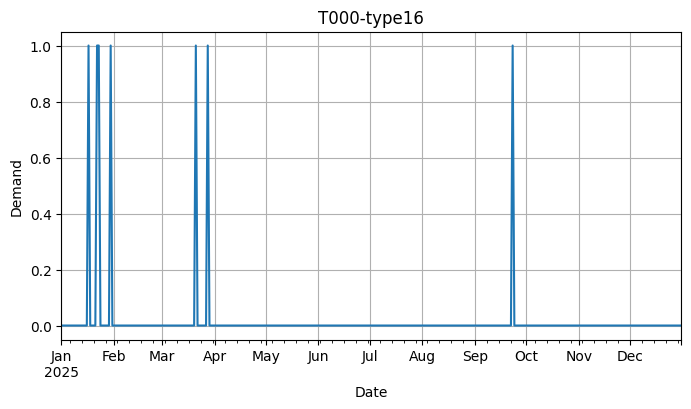

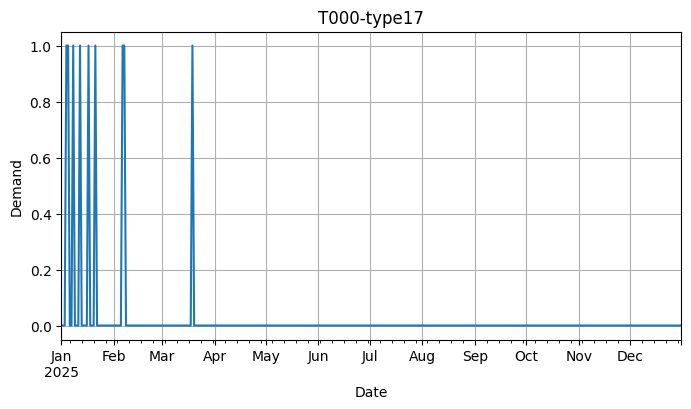

In [420]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# each part 
for col in data_arrange.data_partid.columns[:10]:
    data_arrange.data_partid[col].plot(figsize=(8,4), title=str(col))
    plt.xlabel("Date")
    plt.ylabel("Demand")
    plt.grid(True)
    plt.show()

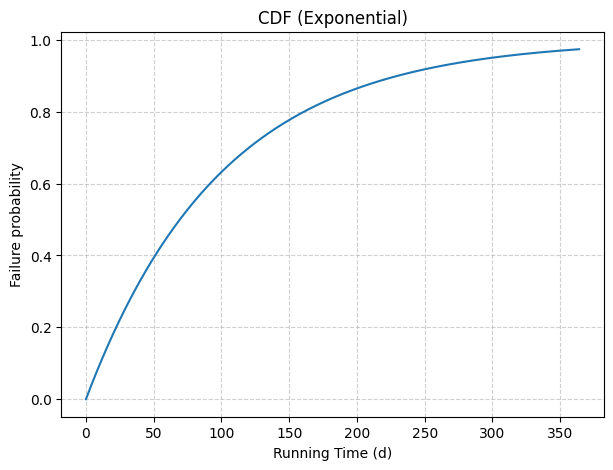

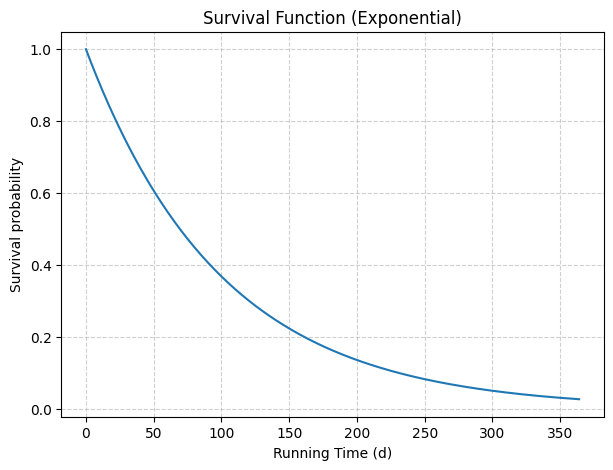

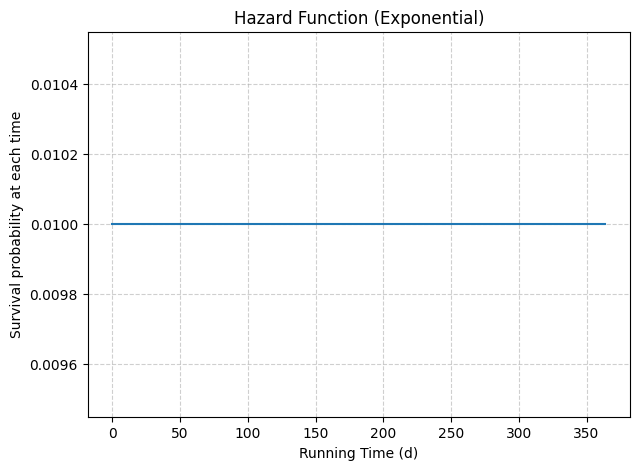

In [421]:
sys.path.append(os.path.abspath('./documents/SurvivalModel'))
import Function as func_mod

# Probability Function class
importlib.reload(func_mod)
Model = func_mod.ProbabilityModel

# Exponential model
model_name = "Exponential"
model = Model(model_name = model_name)
model.draw()

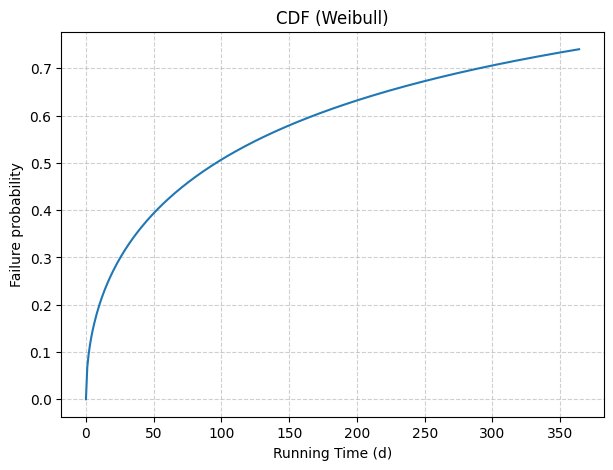

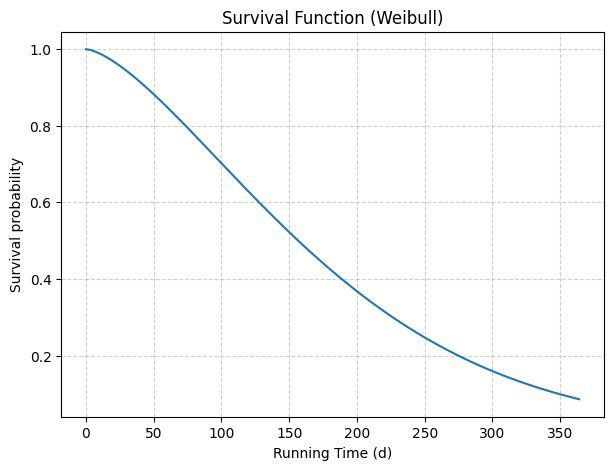

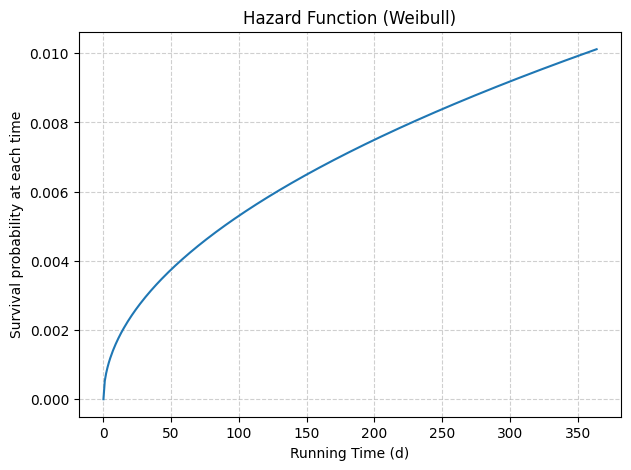

In [422]:
#  model
model_name = "Weibull"
model = Model(model_name = model_name)
model.draw()

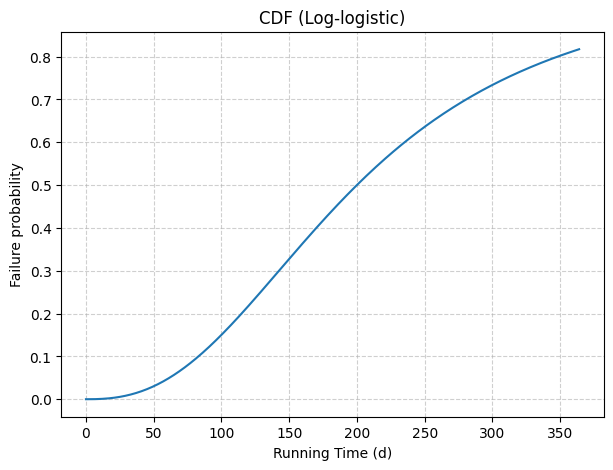

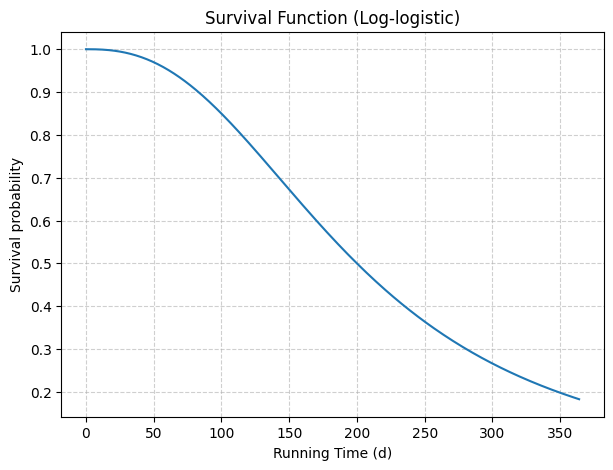

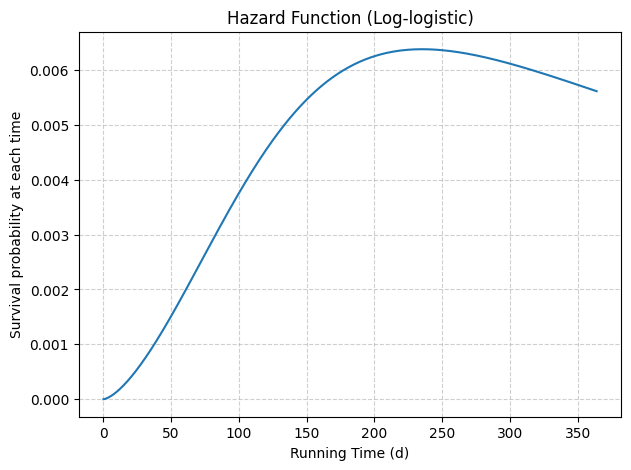

In [423]:
#  model
model_name = "Log-logistic"
model = Model(model_name = model_name)
model.draw()

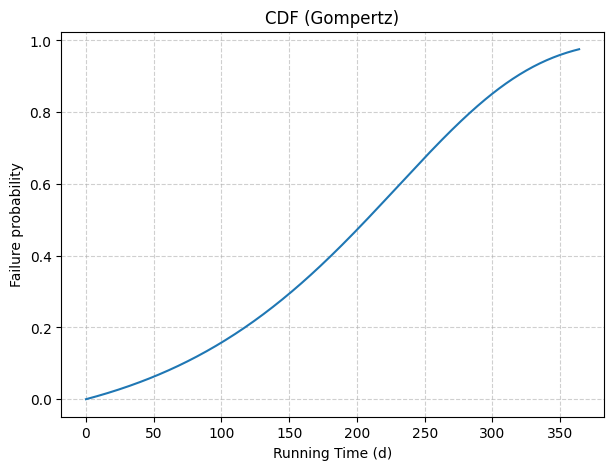

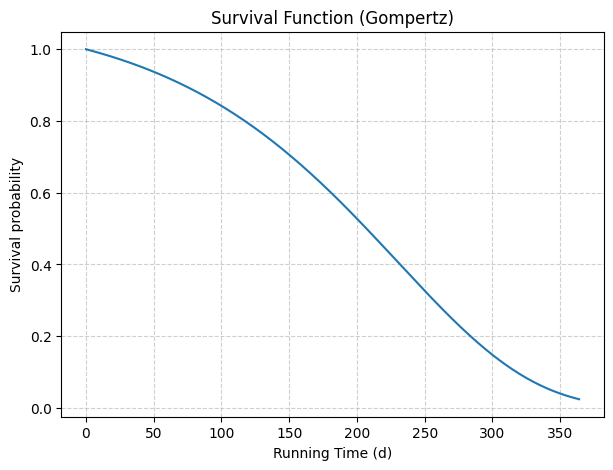

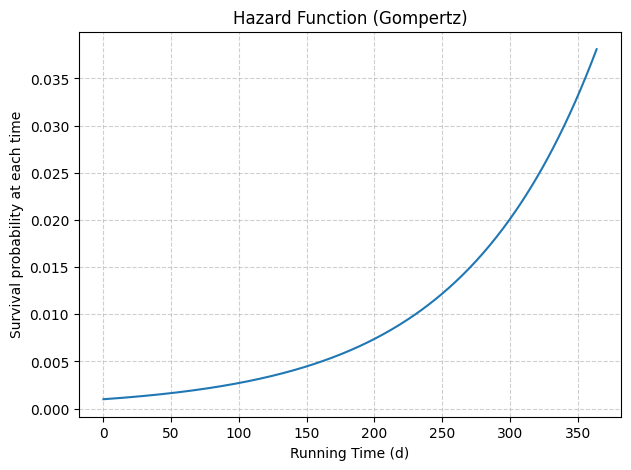

In [424]:
#  model
model_name = "Gompertz"
model = Model(model_name = model_name)
model.draw()